# Basic libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data

In [3]:
gender=pd.read_csv("data/gender_classification.csv")
df=gender.copy()

In [4]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


# Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


# Transformation

In [6]:
cleanup={"gender":{"Male":1, "Female":0}}
df.replace(cleanup, inplace=True)
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [7]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,0.49990
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,0.50005
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,0.00000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.00000


# Visualisation

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

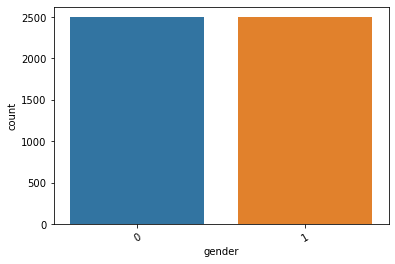

In [8]:
sns.countplot(x='gender', data=df)
plt.xticks(rotation=30)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

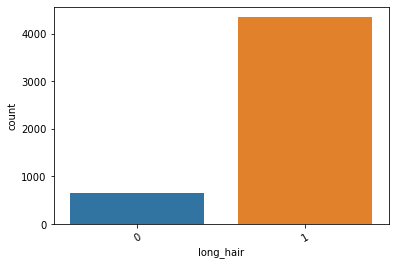

In [9]:
sns.countplot(x='long_hair', data=df)
plt.xticks(rotation=30)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

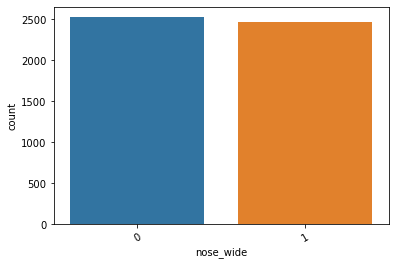

In [10]:
sns.countplot(x='nose_wide', data=df)
plt.xticks(rotation=30)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

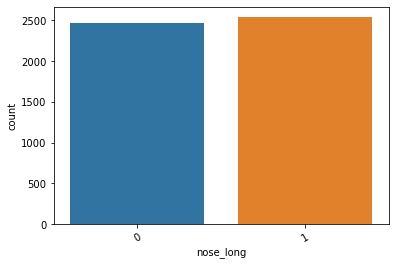

In [11]:
sns.countplot(x='nose_long', data=df)
plt.xticks(rotation=30)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

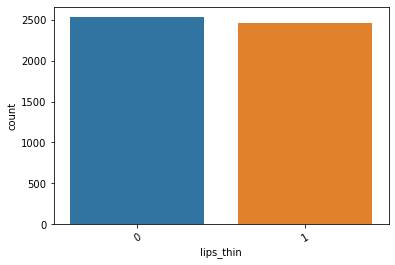

In [12]:
sns.countplot(x='lips_thin', data=df)
plt.xticks(rotation=30)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

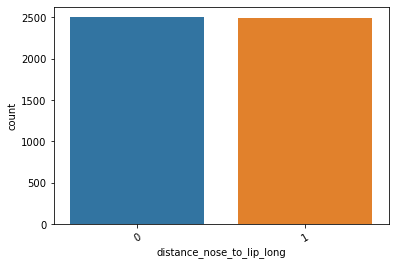

In [13]:
sns.countplot(x='distance_nose_to_lip_long', data=df)
plt.xticks(rotation=30)

# Features selection

In [14]:
df.corr()["gender"].sort_values().to_frame()

,gender
long_hair,-0.010767
forehead_height_cm,0.277190
forehead_width_cm,0.334125
lips_thin,0.743319
nose_long,0.744147
distance_nose_to_lip_long,0.754850
nose_wide,0.758502
gender,1.000000


# Logistic regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [16]:
x=df.drop("gender", axis=1)
y=df["gender"]
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=0)
logreg=LogisticRegression()
logreg.fit(x_train, y_train)
y_pred=logreg.predict(x_test)
print("Accuracy:", logreg.score(x_test, y_test))

Accuracy: 0.9672262190247801


# Confusion matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

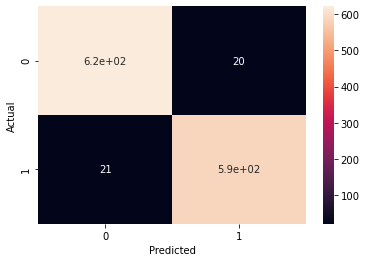

In [17]:
confusion_matrix=pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

# Classification report

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       642
           1       0.97      0.97      0.97       609

    accuracy                           0.97      1251
   macro avg       0.97      0.97      0.97      1251
weighted avg       0.97      0.97      0.97      1251



# K nearest neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
n_neighbors=30
scores=[]
for k in range(1, 30):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    score=round(accuracy_score(y_pred, y_test),3)
    scores.append(score)
    print("Accuracy for k=",k,"is",score)

Accuracy for k= 1 is 0.962
Accuracy for k= 2 is 0.958
Accuracy for k= 3 is 0.965
Accuracy for k= 4 is 0.965
Accuracy for k= 5 is 0.968
Accuracy for k= 6 is 0.968
Accuracy for k= 7 is 0.966
Accuracy for k= 8 is 0.967
Accuracy for k= 9 is 0.965
Accuracy for k= 10 is 0.969
Accuracy for k= 11 is 0.969
Accuracy for k= 12 is 0.97
Accuracy for k= 13 is 0.969
Accuracy for k= 14 is 0.969
Accuracy for k= 15 is 0.968
Accuracy for k= 16 is 0.967
Accuracy for k= 17 is 0.968
Accuracy for k= 18 is 0.967
Accuracy for k= 19 is 0.968
Accuracy for k= 20 is 0.967
Accuracy for k= 21 is 0.966
Accuracy for k= 22 is 0.969
Accuracy for k= 23 is 0.967
Accuracy for k= 24 is 0.969
Accuracy for k= 25 is 0.968
Accuracy for k= 26 is 0.968
Accuracy for k= 27 is 0.968
Accuracy for k= 28 is 0.97
Accuracy for k= 29 is 0.967


Text(0, 0.5, 'Testing acvuracy')

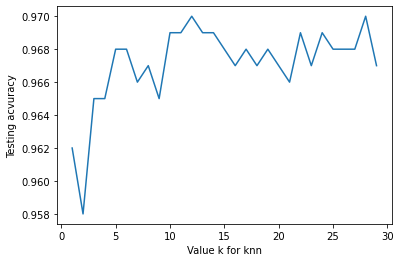

In [21]:
plt.plot(range(1,30), scores)
plt.xlabel('Value k for knn')
plt.ylabel("Testing acvuracy")

# Decision tree

In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree=tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9624300559552358


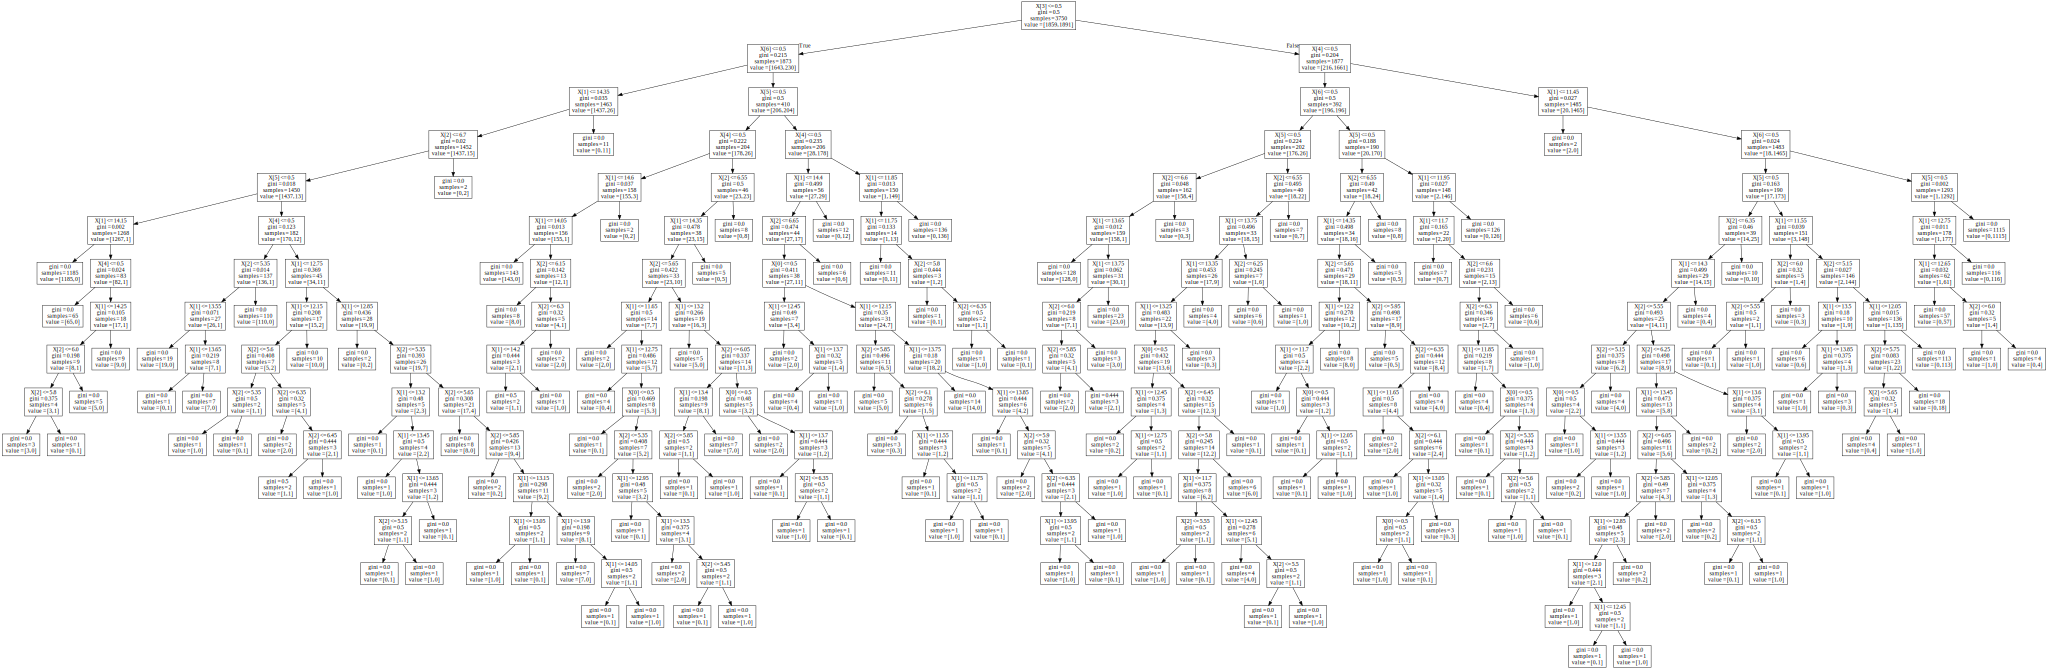

In [23]:
import graphviz
dot_data=tree.export_graphviz(dtree, out_file=None)
graph=graphviz.Source(dot_data)
graph.render("df")
graph

# Random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9664268585131894


# Finally we use the knn with k=12 because it gets the best accuracy

In [25]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred),2))

Accuracy: 0.97


# Cross validation for improving the accuracy of our model

In [26]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn, x, y, cv=5)
print("Accuracy on each fold/subset:", scores)
print("The average accuracy is", sum(scores)/5)

Accuracy on each fold/subset: [0.95504496 0.965      0.98       0.972      0.977     ]
The average accuracy is 0.9698089910089911


# Let's create the function which help us to predict the gender

In [27]:
prd=pd.DataFrame(columns=x.columns)
def predict_gender():
    long_hair=int(input(print("This person has longs hairs (1=yes or 2=no) ? ")))
    forehead_width_cm=float(input(print("Print the forhead width in cm: ")))
    forehead_height_cm=float(input(print("Print the forhead height in cm: ")))
    nose_wide=int(input(print("This person has wide nose (1=yes or 2=no) ? ")))
    nose_long=int(input(print("This person has long nose (1=yes or 2=no) ? ")))
    lips_thin=int(input(print("This person has lips thin (1=yes or 2=no) ? ")))
    distance_nose_to_lip_long=int(input(print("This person has distance nose to lip long (1=yes or 2=no) ? ")))
    prd.loc[-1]=[long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long]
    y_pred=knn.predict(prd)
    if y_pred==1:
        pred="male"
    elif y_pred==0:
        pred="female"
    #print("I predict that this person is ", pred"."")
    #print(type(pred))
    print("I predict that this person is ",pred,".")

# It's time to try predicting

In [29]:
predict_gender()

This person has longs hairs (1=yes or 2=no) ? 
None1
Print the forhead width in cm: 
None8.3
Print the forhead height in cm: 
None6.1
This person has wide nose (1=yes or 2=no) ? 
None0
This person has long nose (1=yes or 2=no) ? 
None0
This person has lips thin (1=yes or 2=no) ? 
None0
This person has distance nose to lip long (1=yes or 2=no) ? 
None1
I predict that this person is  female .


# We can save the values with best prediction. It help us to improve our model and maximize its accuracy. This make our learning deep.